In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
import seaborn as sns


In [2]:
'''Create a new data csv only containing approach task data '''

'Create a new data csv only containing approach task data '

In [3]:

# read in the csv file
df_all_tasks = pd.read_csv('all_feats_all_tasks_non_slimmed.csv')


In [4]:

# select columns that do not have 'bubbles' or 'vad' in the feature name
cols_to_keep = [col for col in df_all_tasks.columns if 'bubbles' not in col and 'vad' not in col]
df_approach = df_all_tasks[cols_to_keep]

# set first column as index
df_approach.set_index(df_all_tasks.columns[0], inplace=True)
df_approach.rename_axis('index', inplace=True)


# display the resulting dataframe
#print(df_filtered.head())




In [5]:

df_approach.to_csv('approach_data.csv')


In [6]:
'''Read in target csv'''

'Read in target csv'

In [7]:
# read in the csv file
df_target = pd.read_csv('target_information.csv')

# set first column as index
df_target.set_index(df_target.columns[0], inplace=True)
df_target.rename_axis('index', inplace=True)


In [8]:
print('Number of features:', len(df_approach.columns))

Number of features: 162


In [9]:
df_approach

,gyro_data_list_0_5 median,gyro_data_list_5_10 median,gyro_data_list_10_15 median,gyro_data_list_15_19 median,gyro_data_list_19_22 median,gyro_data_list_22_25 median,gyro_data_list_25_30 median,gyro_data_list_0_19 median,gyro_data_list_5_19 median,gyro_data_list_19_25 median,...,acc_data_list_10_15 p75,acc_data_list_15_19 p75,acc_data_list_19_22 p75,acc_data_list_22_25 p75,acc_data_list_25_30 p75,acc_data_list_0_19 p75,acc_data_list_5_19 p75,acc_data_list_19_25 p75,total_prop,childid
index,,,,,,,,,,,,,,,,,,,,,
0,0.128292,0.479993,0.303447,0.355703,0.320815,0.197206,0.244369,0.326032,0.384976,0.247906,...,10.024711,10.054550,10.044477,10.008247,9.999482,10.044060,10.085427,10.023572,0.163169,101
1,0.542601,0.678559,1.029654,1.689128,0.485511,0.790854,1.414822,0.919684,1.062043,0.623995,...,10.940824,12.338162,10.505996,10.464329,11.901445,10.866791,11.180405,10.478773,0.242748,102
2,1.018424,1.998895,2.596747,2.322285,1.633896,0.885791,1.990149,1.991992,2.349748,1.090074,...,17.183120,17.221825,12.816291,10.801890,14.749743,14.234490,15.550178,11.661782,0.882330,103
3,0.333189,0.380602,1.350065,0.536570,0.568247,0.200946,0.671701,0.563710,0.679288,0.364314,...,11.423186,10.333784,10.215412,10.061106,10.353235,10.379787,10.521965,10.132831,0.439750,106
4,0.168223,0.168184,0.118722,0.372884,1.275346,1.536374,0.766324,0.174171,0.176502,1.410529,...,9.895007,10.207185,13.306441,12.936690,10.690485,9.966367,9.979933,13.077398,0.561756,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.153965,0.892098,0.931979,0.469442,0.706981,1.421027,0.411352,0.603497,0.729191,0.988467,...,11.339928,10.541241,10.666923,11.610450,10.214824,10.675182,11.069071,10.993871,0.707458,95
80,0.578416,0.622915,0.465488,0.176300,0.108746,0.241375,0.375114,0.511907,0.497738,0.170438,...,10.326610,9.893879,9.846497,9.910648,10.085336,10.215245,10.223327,9.867732,0.109524,10
81,0.228047,0.333735,0.344261,0.123495,0.919056,0.410407,1.066915,0.269448,0.283974,0.597561,...,10.142043,9.849105,10.323354,10.198096,10.996565,9.943250,9.946161,10.247399,0.498049,140


In [10]:
# features drop first and last columns
features = df_approach.iloc[:, 1:-1]

# targets columns are 5 through 12
targets = df_target.iloc[:, 4:12]




In [11]:
targets

,depdxever,anxdxever,adhddxever,depsxtotpres,anxsxtotpres,adhdsxtot,sx_tot,adhd_general
index,,,,,,,,
0,0,0,0,0,0,0,0,0
1,1,1,0,3,5,0,8,0
2,0,1,4,1,10,4,15,1
3,0,1,0,0,4,0,4,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
79,0,0,0,0,5,0,5,0
80,0,1,2,0,5,5,10,1
81,0,0,0,0,0,6,6,0


In [12]:
features

,gyro_data_list_5_10 median,gyro_data_list_10_15 median,gyro_data_list_15_19 median,gyro_data_list_19_22 median,gyro_data_list_22_25 median,gyro_data_list_25_30 median,gyro_data_list_0_19 median,gyro_data_list_5_19 median,gyro_data_list_19_25 median,acc_data_list_0_5 median,...,acc_data_list_5_10 p75,acc_data_list_10_15 p75,acc_data_list_15_19 p75,acc_data_list_19_22 p75,acc_data_list_22_25 p75,acc_data_list_25_30 p75,acc_data_list_0_19 p75,acc_data_list_5_19 p75,acc_data_list_19_25 p75,total_prop
index,,,,,,,,,,,,,,,,,,,,,
0,0.479993,0.303447,0.355703,0.320815,0.197206,0.244369,0.326032,0.384976,0.247906,9.830837,...,10.233248,10.024711,10.054550,10.044477,10.008247,9.999482,10.044060,10.085427,10.023572,0.163169
1,0.678559,1.029654,1.689128,0.485511,0.790854,1.414822,0.919684,1.062043,0.623995,9.789316,...,10.809525,10.940824,12.338162,10.505996,10.464329,11.901445,10.866791,11.180405,10.478773,0.242748
2,1.998895,2.596747,2.322285,1.633896,0.885791,1.990149,1.991992,2.349748,1.090074,9.828744,...,13.031779,17.183120,17.221825,12.816291,10.801890,14.749743,14.234490,15.550178,11.661782,0.882330
3,0.380602,1.350065,0.536570,0.568247,0.200946,0.671701,0.563710,0.679288,0.364314,9.830510,...,10.305887,11.423186,10.333784,10.215412,10.061106,10.353235,10.379787,10.521965,10.132831,0.439750
4,0.168184,0.118722,0.372884,1.275346,1.536374,0.766324,0.174171,0.176502,1.410529,9.812487,...,9.970173,9.895007,10.207185,13.306441,12.936690,10.690485,9.966367,9.979933,13.077398,0.561756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.892098,0.931979,0.469442,0.706981,1.421027,0.411352,0.603497,0.729191,0.988467,9.827823,...,11.515036,11.339928,10.541241,10.666923,11.610450,10.214824,10.675182,11.069071,10.993871,0.707458
80,0.622915,0.465488,0.176300,0.108746,0.241375,0.375114,0.511907,0.497738,0.170438,9.798252,...,10.432097,10.326610,9.893879,9.846497,9.910648,10.085336,10.215245,10.223327,9.867732,0.109524
81,0.333735,0.344261,0.123495,0.919056,0.410407,1.066915,0.269448,0.283974,0.597561,9.788687,...,9.951640,10.142043,9.849105,10.323354,10.198096,10.996565,9.943250,9.946161,10.247399,0.498049


In [13]:
# we want to do this for each target column. So it needs to be done in a loop, maybe using a function.



# def lasso(X,y):
    
#     '''Perform a lasso regression given features X and target variables y'''
    
#     lasso = LassoCV(cv=8, random_state=0, max_iter=10**5, alphas=np.logspace(-3, 10, 100)) # 10**3 was insufficient. 
#     lasso.fit(X, y)
#     lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_.mean(axis=0)})
#     lasso_coefs = lasso_coefs.sort_values(by='Coefficient', ascending=False)
    
#     return lasso_coefs


<AxesSubplot:>

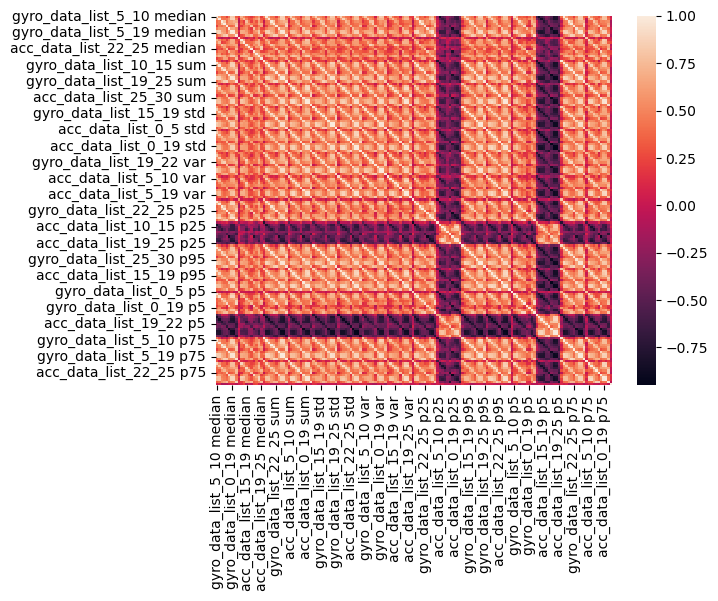

In [14]:
# create correlation matrix
features.corr()
sns.heatmap(features.corr())

In [15]:


# Use lasso regression to get coefficients for feature importance to targets for each feature
# this = lasso(features,targets.iloc[:,0])
# print(this)
# # for i in range(len(targets.columns)):
# #     indi_coeffs = lasso(features,targets.iloc[:,i])
# #     print(indi_coeffs)








In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# feature_values = features.values
# target_values = targets.values

In [17]:
#feature_values = StandardScaler().fit_transform(feature_values)

In [18]:
# Standardize the feature data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize the PCA model and fit the standardized data
pca = PCA(n_components=8)
pca.fit(scaled_features)

# Transform the original data to the new reduced dimension space
transformed_data = pca.transform(scaled_features)

pc_df = pd.DataFrame(data = transformed_data
             , columns = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7'])


# Print pc0
#print(transformed_data[0]) 

In [19]:


pc_df



,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-8.176006,-0.482345,-0.729425,-0.297309,1.837207,0.253860,-1.277110,0.303980
1,5.438507,-1.513326,-2.680715,6.751001,-3.677424,-0.662450,-1.232144,-2.805825
2,29.542733,-7.633304,0.569523,11.806428,-6.340692,3.151984,-1.896825,-1.253285
3,-2.499085,-2.342269,-1.584939,1.430104,-0.161286,1.399308,-0.068844,1.353443
4,-0.675988,9.315819,3.048961,1.126738,-1.552248,-1.014943,3.403754,-1.070169
...,...,...,...,...,...,...,...,...
79,2.975147,1.232887,-0.331759,-4.249722,-0.126445,0.840754,2.288601,-0.045755
80,-5.830148,-2.804359,0.601625,-0.462011,0.059230,0.294888,-0.958153,-0.649591
81,-5.144948,1.235603,-0.101833,2.299389,-3.271508,-2.276815,0.198178,0.738584
82,22.191101,2.899560,-2.616685,6.127958,9.399154,-7.033456,-1.068876,5.906221


In [20]:
explained_vr = pca.explained_variance_ratio_
print(explained_vr)


[0.50908989 0.12434788 0.06481318 0.05526525 0.03914179 0.02832561
 0.02615649 0.02446956]


In [21]:
sum(explained_vr[0:8])

0.8716096453467207

Text(0, 0.5, 'Cumulative Explained Variance')

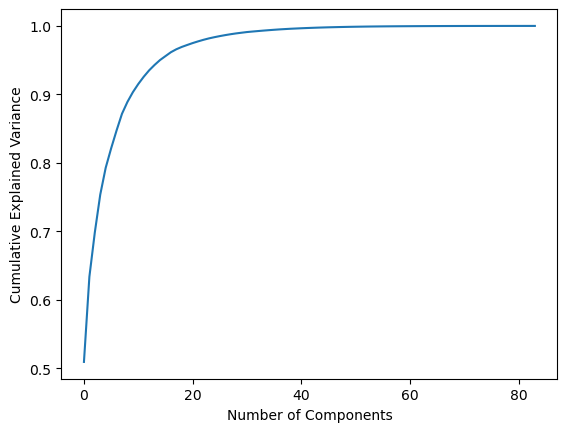

In [22]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [23]:
#neural net?

In [24]:
# look at coefficients if you use the PCAs

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
# create a dataframe that contains pc_df | targets

#data_target0 = pd.concat([pc_df,targets.iloc[:,0]],axis=1)      # this will get you just the first target column appended
pc_and_targets = pd.concat([pc_df,targets],axis=1)                  # this will get you just all target columns appended



In [27]:
pc_and_targets


'''Turn all non-zero values = 1'''
pc_and_targets.iloc[:, -8:] = (pc_and_targets.iloc[:, -8:] != 0).astype(int)


In [28]:
from sklearn.model_selection import train_test_split

#train, val = train_test_split(pc_and_targets, test_size = .20, random_state = 42)

In [29]:
pc_and_targets

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,depdxever,anxdxever,adhddxever,depsxtotpres,anxsxtotpres,adhdsxtot,sx_tot,adhd_general
0,-8.176006,-0.482345,-0.729425,-0.297309,1.837207,0.253860,-1.277110,0.303980,0,0,0,0,0,0,0,0
1,5.438507,-1.513326,-2.680715,6.751001,-3.677424,-0.662450,-1.232144,-2.805825,1,1,0,1,1,0,1,0
2,29.542733,-7.633304,0.569523,11.806428,-6.340692,3.151984,-1.896825,-1.253285,0,1,1,1,1,1,1,1
3,-2.499085,-2.342269,-1.584939,1.430104,-0.161286,1.399308,-0.068844,1.353443,0,1,0,0,1,0,1,0
4,-0.675988,9.315819,3.048961,1.126738,-1.552248,-1.014943,3.403754,-1.070169,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2.975147,1.232887,-0.331759,-4.249722,-0.126445,0.840754,2.288601,-0.045755,0,0,0,0,1,0,1,0
80,-5.830148,-2.804359,0.601625,-0.462011,0.059230,0.294888,-0.958153,-0.649591,0,1,1,0,1,1,1,1
81,-5.144948,1.235603,-0.101833,2.299389,-3.271508,-2.276815,0.198178,0.738584,0,0,0,0,0,1,1,0
82,22.191101,2.899560,-2.616685,6.127958,9.399154,-7.033456,-1.068876,5.906221,1,1,1,1,1,1,1,1


In [30]:
# from sklearn.linear_model import LogisticRegression 
# from sklearn import linear_model as lm

# linear_model = lm.LogisticRegression()

# x_train = train.iloc[:,0:8]
# y_train = train.iloc[:,9]

# x_val = val.iloc[:,0:8]
# y_val = val.iloc[:,9]


# linear_model.fit(x_train, y_train)
# y_fitted = linear_model.predict(x_train) # Create a fitted model based on training set
# y_predicted = linear_model.predict(x_val) # Use model on validation set

# training_accuracy = model.score(X_train, Y_train)
# print("Training Accuracy: ", training_accuracy)






In [31]:
#print(x_train)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


train, val = train_test_split(pc_and_targets, test_size = .20, random_state = 42)



In [33]:
def Get_Performance_Metrics(y_test, y_pred, y_pred_proba):

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix:')
    print(cm)

#     # Calculate precision, recall, and F1 score
#     report = classification_report(y_test, y_pred)
#     print('Classification report:')
#     print(report)


    # make ROC 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV





def Tune_Logistic_Regression():
    # define models to compare
    lr_model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)

    # Define parameter grid for GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='roc_auc')
    
    return grid_search

In [35]:
from sklearn.neural_network import MLPClassifier

def Tune_Neural_Network():
    # define models to compare
    nn_model = MLPClassifier(max_iter=10000)

    # Define parameter grid for GridSearchCV
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01, 0.1],
    }

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=nn_model, param_grid=param_grid, cv=5, scoring='roc_auc')

    return grid_search




In [36]:
from sklearn.tree import DecisionTreeClassifier

def Tune_Decision_Tree():
    # define models to compare
    dt_model = DecisionTreeClassifier()

    # Define parameter grid for GridSearchCV
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='roc_auc')

    return grid_search



In [37]:
from sklearn.ensemble import RandomForestClassifier

def Tune_Random_Forest():
    # define models to compare
    rf_model = RandomForestClassifier()

    # Define parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc')

    return grid_search



In [38]:
lr_model = Tune_Logistic_Regression()
nn_model = Tune_Neural_Network()
dt_model = Tune_Decision_Tree()
rf_model = Tune_Random_Forest()









def Predict_Target(model_name, target_column_index):
    
    # Splitting the data into training and testing sets
    X = pc_and_targets.iloc[:,0:8]  # Using the first 8 principal components as features
    y = pc_and_targets.iloc[:,target_column_index]  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the model
    # lr_model = LogisticRegression()
    # lr_model = LogisticRegressionCV(Cs=10, penalty='l1', solver='saga', cv=5, max_iter=10000)

    # fit the model with training data
    model_name.fit(X_train, y_train)
    
    # define the model with the best C value
    model_best_estimator = model_name.best_estimator_
    
    

    # Predicting on the test set
    y_pred = model_best_estimator.predict(X_test)
    
    # get predicted probabilities
    y_pred_proba = model_best_estimator.predict_proba(X_test)[:,1]
    
    # Get Performance Metrics
    Get_Performance_Metrics(y_test, y_pred, y_pred_proba)

---------------------------- Target Column:8------------------------------
Accuracy: 0.9411764705882353
Confusion matrix:
[[16  0]
 [ 1  0]]


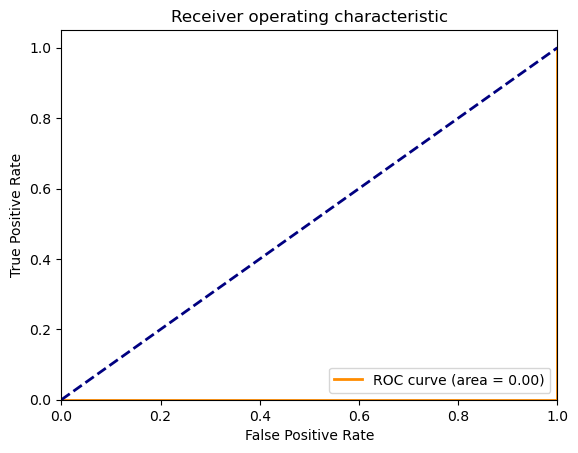

---------------------------- Target Column:9------------------------------
Accuracy: 0.7647058823529411
Confusion matrix:
[[12  1]
 [ 3  1]]


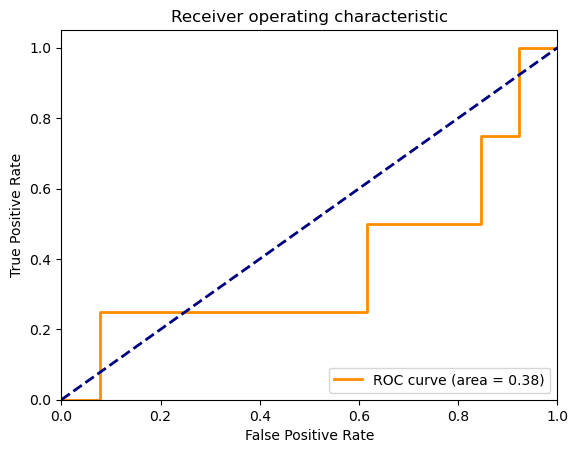

---------------------------- Target Column:10------------------------------
Accuracy: 0.8235294117647058
Confusion matrix:
[[14  1]
 [ 2  0]]


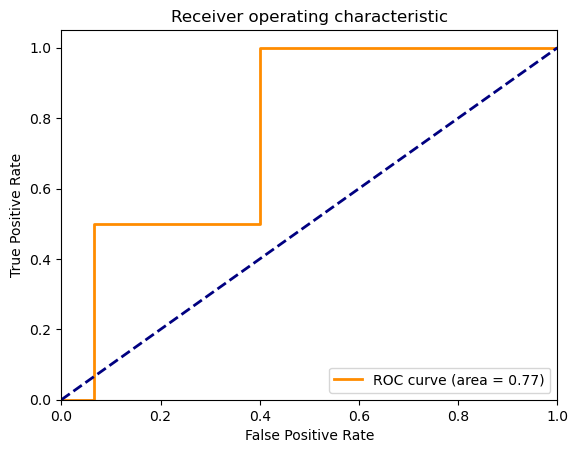

In [39]:
''' Logistic Regression '''


# Value can be 8 through 11

# Get performance 
for target_column_index in range(8,11):
    print('---------------------------- Target Column:'+str(target_column_index)+'------------------------------')
    Predict_Target(lr_model, target_column_index)


In [40]:
'''Why did changing nonzero values to 1 impact the models ability to work?'''

'Why did changing nonzero values to 1 impact the models ability to work?'

---------------------------- Target Column:8------------------------------
Accuracy: 0.8823529411764706
Confusion matrix:
[[15  1]
 [ 1  0]]


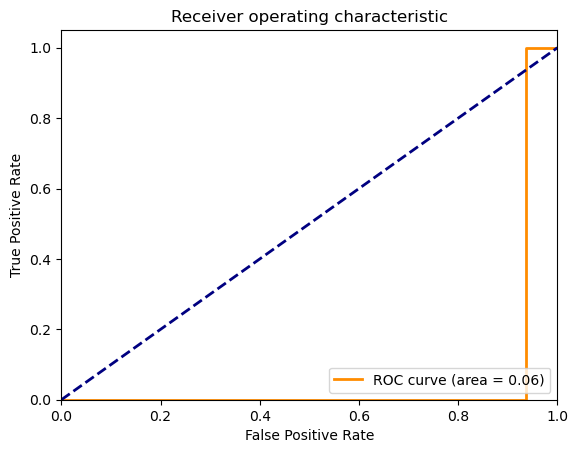

---------------------------- Target Column:9------------------------------
Accuracy: 0.47058823529411764
Confusion matrix:
[[8 5]
 [4 0]]


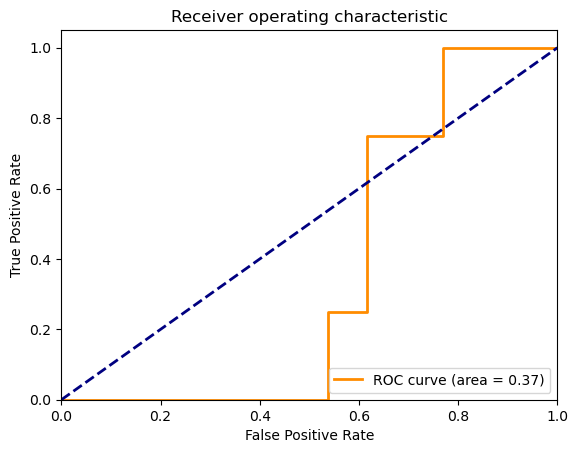

---------------------------- Target Column:10------------------------------
Accuracy: 0.7647058823529411
Confusion matrix:
[[13  2]
 [ 2  0]]


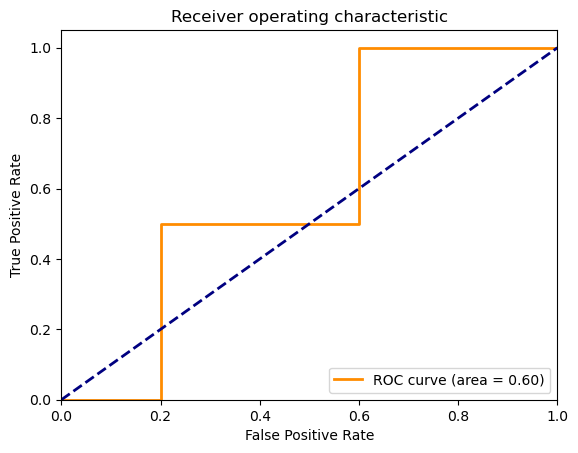

In [41]:
''' Neural Network '''


# Value can be 8 through 15

# Get performance 
for target_column_index in range(8,11):
    print('---------------------------- Target Column:'+str(target_column_index)+'------------------------------')
    Predict_Target(nn_model, target_column_index)
    

---------------------------- Target Column:8------------------------------
Accuracy: 0.9411764705882353
Confusion matrix:
[[16  0]
 [ 1  0]]


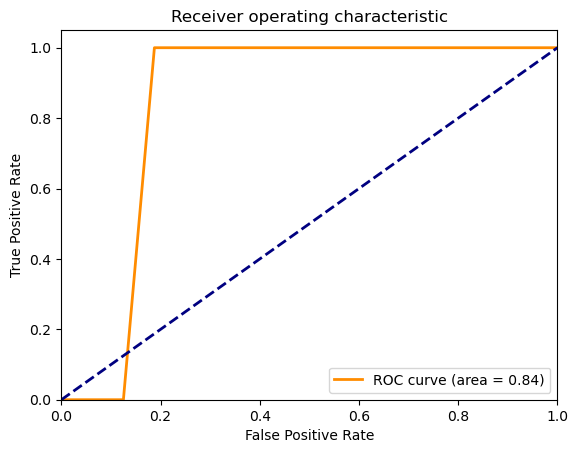

---------------------------- Target Column:9------------------------------
Accuracy: 0.5294117647058824
Confusion matrix:
[[7 6]
 [2 2]]


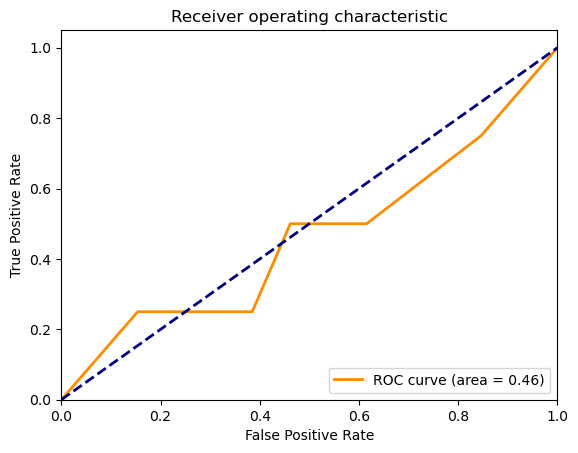

---------------------------- Target Column:10------------------------------
Accuracy: 0.7647058823529411
Confusion matrix:
[[12  3]
 [ 1  1]]


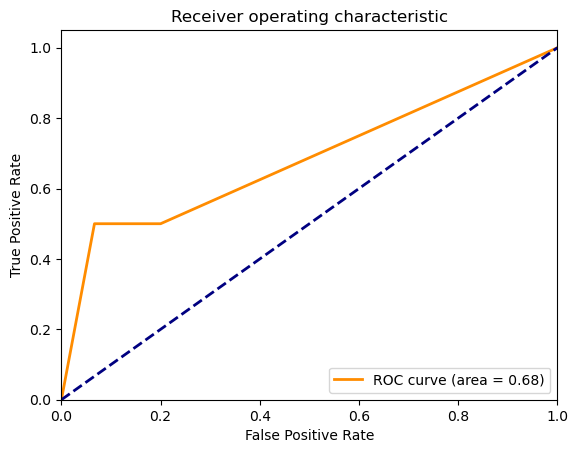

In [42]:
''' Decision Tree '''


# Value can be 8 through 15

# Get performance 
for target_column_index in range(8,11):
    print('---------------------------- Target Column:'+str(target_column_index)+'------------------------------')
    Predict_Target(dt_model, target_column_index)
    

---------------------------- Target Column:8------------------------------
Accuracy: 0.8823529411764706
Confusion matrix:
[[15  1]
 [ 1  0]]


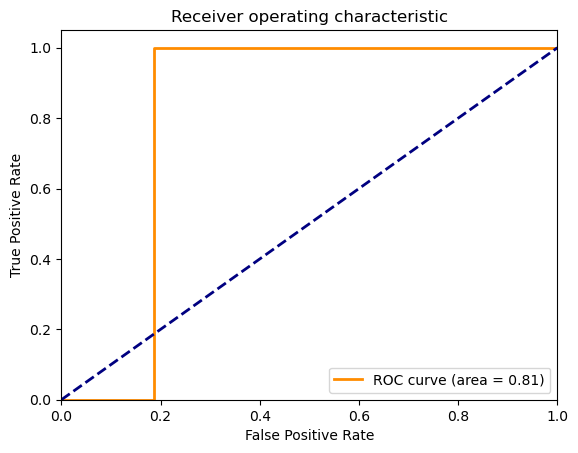

---------------------------- Target Column:9------------------------------


In [ ]:
''' Random Forest '''


# Value can be 8 through 15

# Get performance 
for target_column_index in range(8,11):
    print('---------------------------- Target Column:'+str(target_column_index)+'------------------------------')
    Predict_Target(rf_model, target_column_index)
    